## IMPORT DATA

In [66]:
import numpy as np #for working with arrays
import pandas as pd #provides numerous tools for data analysis
import json # for JSON files
import datetime as dt
import hmac #a Python package that uses Hamiltonian Monte Carlo (HMC) to sample from probability distributions
import requests # library to handle requests
from pandas.io.json import json_normalize #for normalization
import matplotlib.cm as cm # Matplotlib for plotting modules
import matplotlib.colors as colors


In [67]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim #for getting logitude and latitude from address


Solving environment: done

# All requested packages already installed.



In [68]:
!pip install folium
import folium #importing folium so we can render maps
print('Import complete') 

Import complete


" "

Now we have imported all the required libraries. So , lets get our data and read it using read_csv into a dataframe i.e. 'price_df'

## Importing the data from the site with read_csv

In [ ]:
price_df = pd.read_csv("http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv")

Let us have a view of firts 5 rows of our dataset 

In [ ]:
price_df.head()

As we see the column names are not quite familiar. So we will set new names for our dataset which migh seem comfortable. 

In [71]:
price_df.columns = ['ID', 'Price', 'TransferDate', 'Postcode', 'TypeProp', 'New-Old',\
                         'frhld_lease', 'PrimAdrs', 'ScndAdrs', 'Street', 'Locality', 'Town_City',\
                         'District', 'County', 'stnrd_addtnl', 'site']
price_df.head(100)

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
0,{A96E4ACB-F6D9-9205-E053-6C04A8C0DA09},249950,2004-05-26 00:00,EX17 4PH,S,N,F,4,NaN,MEADOW END COTTAGES,SANDFORD,CREDITON,MID DEVON,DEVON,A,A
1,{A96E4ACC-2B18-9205-E053-6C04A8C0DA09},489000,2004-07-08 00:00,GU31 5SE,S,N,F,HOP KILN,"HOPLOFT HOUSE, 1",BONES LANE,BURITON,PETERSFIELD,EAST HAMPSHIRE,HAMPSHIRE,A,A
2,{A96E4ACC-769D-9205-E053-6C04A8C0DA09},64000,2004-01-30 00:00,WS12 3HE,S,N,F,4,NaN,CHAPEL STREET,HEATH HAYES,CANNOCK,CANNOCK CHASE,STAFFORDSHIRE,A,A
3,{A96E4ACC-8148-9205-E053-6C04A8C0DA09},207000,2004-12-03 00:00,NR34 7TG,D,N,F,HALFWAY COTTAGE,NaN,ELLOUGH ROAD,ELLOUGH,BECCLES,EAST SUFFOLK,SUFFOLK,A,A
4,{A96E4ACC-81BD-9205-E053-6C04A8C0DA09},155000,2004-11-26 00:00,IP1 4QE,T,N,F,25,NaN,TANNERS VIEW,NaN,IPSWICH,IPSWICH,SUFFOLK,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{A96E4ACB-D1A4-9205-E053-6C04A8C0DA09},78950,2002-03-27 00:00,BS22 8DF,T,N,F,132,NaN,MILTON BROW,NaN,WESTON-SUPER-MARE,NORTH SOMERSET,NORTH SOMERSET,A,A
96,{A96E4ACB-F91C-9205-E053-6C04A8C0DA09},155000,2002-12-11 00:00,TQ7 3JY,F,Y,L,SEAMARK,SEA POPPY,NaN,THURLESTONE SANDS,KINGSBRIDGE,SOUTH HAMS,DEVON,A,A
97,{A96E4ACB-FDA0-9205-E053-6C04A8C0DA09},169314,2002-07-26 00:00,BH4 9DB,F,N,L,"ROYAL VICTORIA APARTMENTS, 17",FLAT 15-16,POOLE ROAD,WESTBOURNE,BOURNEMOUTH,"BOURNEMOUTH, CHRISTCHURCH AND POOLE","BOURNEMOUTH, CHRISTCHURCH AND POOLE",A,A
98,{A96E4ACC-63FD-9205-E053-6C04A8C0DA09},260000,2002-01-31 00:00,NR4 7PD,D,N,F,"UPTON LODGE, 1A",NaN,UPTON CLOSE,NaN,NORWICH,NORWICH,NORFOLK,A,A


 lets check how many rows and columns we have


In [72]:
price_df.shape 

(77588, 16)

This shows that our dataset has 77588 rows and 16 columns

## Cleaning data

In [73]:
 # Convert the date from string to datetime so we can work with it
price_df['TransferDate'] = price_df['TransferDate'].apply(pd.to_datetime)

#We will delete past transactions which happend before 2017 because we are interested in latest transactions only
price_df.drop(price_df[price_df.TransferDate.dt.year < 2018].index, inplace=True) 

#And we will sort by the date of transfer now that it is in datetime
price_df.sort_values(by=['TransferDate'],ascending=[False],inplace=True)

Now lets review the changes thus made

In [74]:
price_df.head(10)

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
56002,{A96E4ACC-16A1-9205-E053-6C04A8C0DA09},355000,2020-06-26,SS6 8EG,S,N,F,71,NaN,VICTORIA ROAD,NaN,RAYLEIGH,ROCHFORD,ESSEX,A,A
49342,{A96E4ACC-318D-9205-E053-6C04A8C0DA09},130000,2020-06-26,HU2 8GA,F,N,L,"KINGSTON COURT, 6",APARTMENT 8,KINGSTON SQUARE,NaN,HULL,CITY OF KINGSTON UPON HULL,CITY OF KINGSTON UPON HULL,A,A
25668,{A96E4ACC-C196-9205-E053-6C04A8C0DA09},75000,2020-06-26,LS9 7HA,T,N,F,32,NaN,SCARGILL CLOSE,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A
31928,{A96E4ACC-9218-9205-E053-6C04A8C0DA09},79950,2020-06-25,S26 4NU,T,N,L,16,NaN,HELMSLEY CLOSE,SWALLOWNEST,SHEFFIELD,ROTHERHAM,SOUTH YORKSHIRE,A,A
52423,{A96E4ACB-D7C6-9205-E053-6C04A8C0DA09},345000,2020-06-25,RG7 5AX,T,N,F,4,NaN,PLAY PLATT,THEALE,READING,WEST BERKSHIRE,WEST BERKSHIRE,A,A
8275,{A96E4ACC-F406-9205-E053-6C04A8C0DA09},250000,2020-06-25,RH19 1HG,O,N,F,150,ST JAMES HOUSE,LONDON ROAD,NaN,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,B,A
43158,{A96E4ACC-48BD-9205-E053-6C04A8C0DA09},120000,2020-06-24,PE23 4BE,S,N,F,ROSE COTTAGE,NaN,MAIN ROAD,WEST KEAL,SPILSBY,EAST LINDSEY,LINCOLNSHIRE,A,A
3576,{A96E4ACC-EE3C-9205-E053-6C04A8C0DA09},295000,2020-06-23,SE1 8QW,O,N,F,27,FLAT 13,WEBBER STREET,NaN,LONDON,SOUTHWARK,GREATER LONDON,B,A
62810,{A96E4ACC-125E-9205-E053-6C04A8C0DA09},287000,2020-06-22,SS4 1HW,T,N,F,17C,NaN,WARWICK DRIVE,NaN,ROCHFORD,ROCHFORD,ESSEX,A,A
55072,{A96E4ACC-15B4-9205-E053-6C04A8C0DA09},192000,2020-06-22,SS0 7EX,F,N,L,MONTAGUE COURT,FLAT 78,HAMLET COURT ROAD,NaN,WESTCLIFF-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A


In [75]:
#new size of our dataset
price_df.shape

(76397, 16)

As per our problem we need to check prices in Southhampton

In [76]:
df_southampton = price_df.query("Town_City == 'SOUTHAMPTON'") # Lets filter so we can only check prices in Southampton
streets = df_southampton['Street'].unique().tolist()
streets

['SUNNYFIELD RISE',
 'THE WARREN',
 'CASTLE WAY',
 'RATCLIFFE ROAD',
 'MONARCH WAY',
 'CRANMER DRIVE',
 'ST PAULS ROAD',
 'PARK ROAD',
 'PACIFIC CLOSE',
 'ALBACORE AVENUE',
 'CLAREMONT ROAD',
 'BOWER CLOSE',
 'HILLDOWN ROAD',
 'KAYAK CLOSE',
 'HAMPTON LANE',
 'ABERDEEN ROAD',
 'LOCKS HEATH PARK ROAD',
 'BAY ROAD',
 'TAYLOR CLOSE',
 'HAREFIELD ROAD',
 'BARNFIELD ROAD',
 'WARSASH ROAD',
 'SPRING VALE',
 'VALE DRIVE',
 'CARNATION ROAD',
 'WALKER GARDENS',
 'CRANBOURNE PARK',
 'ROBERT CECIL AVENUE',
 'MAPLETON ROAD',
 'LOCKS ROAD',
 'MON CRESCENT',
 'HAVENDALE',
 'SHIRLEY PARK ROAD',
 'CHANNELS FARM ROAD',
 'ST MONICA ROAD',
 'AVENUE ROAD',
 'HINDMARCH CRESCENT',
 'ONIBURY ROAD',
 'WALNUT AVENUE',
 'FALLOW CRESCENT',
 'WHITES WAY',
 'FORESTER ROAD',
 'NEWTON ROAD',
 'CHAPEL CRESCENT',
 'CHERITON AVENUE',
 'BLACKWATER MEWS',
 'LANGSTAFF WAY',
 'SWIFT ROAD',
 'LONGMORE AVENUE',
 'TUDOR CLOSE',
 'RUSHINGTON LANE',
 'ALMA LANE',
 'HILLYFIELDS',
 'TOPIARY GARDENS',
 'CLOVER CLOSE',
 'PRIMROSE R

This is the list of all streets in Southampton

Now we can check the average price for every street

In [77]:
southampton_grp_price = df_southampton.groupby(['Street'])['Price'].mean().reset_index() # lets get the avarage price for every street
southampton_grp_price.columns = ['Street', 'Avg_Price'] # lets create columns for the street according to price

In [78]:
southampton_dream = southampton_grp_price.query("(Avg_Price >= 2000) & (Avg_Price <= 120000)") # because our price limit is 120k this is what we will be aiming a

In [79]:
southampton_dream 

,Street,Avg_Price
10,ANSON DRIVE,97500.0
29,BERNARD STREET,40000.0
77,CHERWELL CRESCENT,88000.0
149,GOLDEN GROVE,90000.0
157,GROVE GARDENS,105000.0
163,HAMPTON LANE,110000.0
172,HERRICK CLOSE,112000.0
175,HIGH STREET,82000.0
178,HILL LANE,110000.0
194,HOWARD ROAD,89000.0


## Now we can  add latitude and longitude coordinates to our streets


Import required libraries

In [80]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans #lets import k-means
import numpy as np
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [81]:
for index, item in southampton_dream.iterrows():
    print(f"index: {index}")
    print(f"item: {item}")
    print(f"item.Street only: {item.Street}")

index: 10
item: Street       ANSON DRIVE
Avg_Price          97500
Name: 10, dtype: object
item.Street only: ANSON DRIVE
index: 29
item: Street       BERNARD STREET
Avg_Price             40000
Name: 29, dtype: object
item.Street only: BERNARD STREET
index: 77
item: Street       CHERWELL CRESCENT
Avg_Price                88000
Name: 77, dtype: object
item.Street only: CHERWELL CRESCENT
index: 149
item: Street       GOLDEN GROVE
Avg_Price           90000
Name: 149, dtype: object
item.Street only: GOLDEN GROVE
index: 157
item: Street       GROVE GARDENS
Avg_Price           105000
Name: 157, dtype: object
item.Street only: GROVE GARDENS
index: 163
item: Street       HAMPTON LANE
Avg_Price          110000
Name: 163, dtype: object
item.Street only: HAMPTON LANE
index: 172
item: Street       HERRICK CLOSE
Avg_Price           112000
Name: 172, dtype: object
item.Street only: HERRICK CLOSE
index: 175
item: Street       HIGH STREET
Avg_Price          82000
Name: 175, dtype: object
item.Street onl

In [82]:
geolocator = Nominatim(user_agent = "city")

In [83]:
southampton_dream['city_coord'] = southampton_dream['Street'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
southampton_dream[['Latitude', 'Longitude']] = southampton_dream['city_coord'].apply(pd.Series) # add them in columns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Lets see how our datadet looks with added longitude and latitude columns

In [85]:
southampton_dream

,Street,Avg_Price,city_coord,Latitude,Longitude
10,ANSON DRIVE,97500.0,"(52.3389878, -0.0798562)",52.338988,-0.079856
29,BERNARD STREET,40000.0,"(55.9762976, -3.1697564)",55.976298,-3.169756
77,CHERWELL CRESCENT,88000.0,"(-22.1791372, 148.0699498)",-22.179137,148.069950
149,GOLDEN GROVE,90000.0,"(34.731792999999996, -82.44201554409824)",34.731793,-82.442016
157,GROVE GARDENS,105000.0,"(22.2274208, 114.20074663804016)",22.227421,114.200747
163,HAMPTON LANE,110000.0,"(40.218594, -75.12251)",40.218594,-75.122510
172,HERRICK CLOSE,112000.0,"(52.599441, -0.2546029)",52.599441,-0.254603
175,HIGH STREET,82000.0,"(55.9498387, -3.1900463)",55.949839,-3.190046
178,HILL LANE,110000.0,"(42.555403, -71.648358)",42.555403,-71.648358
194,HOWARD ROAD,89000.0,"(42.434256, -71.463485)",42.434256,-71.463485


In [86]:
#for nearer locations
southampton_dream = southampton_dream.query("(Latitude >= 50.83) & (Latitude <= 51)")
southampton_dream

,Street,Avg_Price,city_coord,Latitude,Longitude
206,KENSINGTON FIELDS,110000.0,"(50.8604243, -1.4207463)",50.860424,-1.420746
226,LOWER CANAL WALK,115000.0,"(50.897111, -1.4022897)",50.897111,-1.402290
251,MILLBROOK ROAD EAST,119500.0,"(50.9098907, -1.4266578)",50.909891,-1.426658
318,PYLEWELL ROAD,60000.0,"(50.8694403, -1.4000328)",50.869440,-1.400033
436,WIMPSON LANE,85500.0,"(50.9201304, -1.4571668)",50.920130,-1.457167


## PLOTTING MAP

In [87]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [88]:
mid = southampton_dream['Street']
southampton_dream.drop(labels=['Street'], axis=1,inplace = True)
southampton_dream.insert(0, 'Street', mid)
southampton_dream

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Street,Avg_Price,city_coord,Latitude,Longitude
206,KENSINGTON FIELDS,110000.0,"(50.8604243, -1.4207463)",50.860424,-1.420746
226,LOWER CANAL WALK,115000.0,"(50.897111, -1.4022897)",50.897111,-1.402290
251,MILLBROOK ROAD EAST,119500.0,"(50.9098907, -1.4266578)",50.909891,-1.426658
318,PYLEWELL ROAD,60000.0,"(50.8694403, -1.4000328)",50.869440,-1.400033
436,WIMPSON LANE,85500.0,"(50.9201304, -1.4571668)",50.920130,-1.457167


In [89]:
southampton_dream.sort_values('Avg_Price', inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


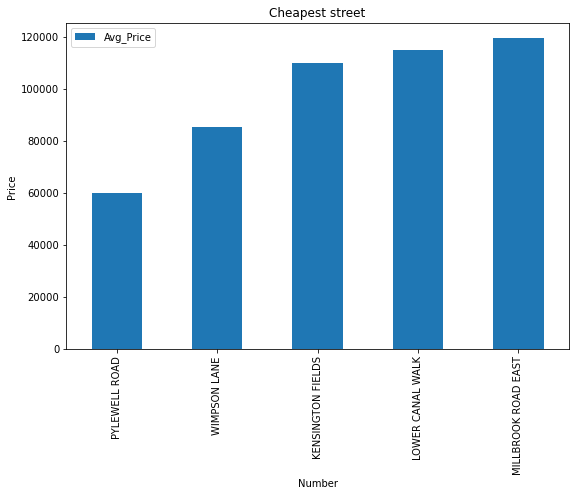

In [90]:

# step 2: plot data
southampton_dream.plot(y = "Avg_Price", x ="Street", kind='bar', figsize=(9, 6))

plt.xlabel('Number') # add to x-label to the plot
plt.ylabel('Price') # add y-label to the plot
plt.title('Cheapest street') # add title to the plot

plt.show()

# Lets check the geographic co-ordinates for Southampton and have a view of its map

In [91]:
address = 'Southampton, England'
geolocator = Nominatim(user_agent='city')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Southampton are are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Southampton are are 50.9025349, -1.404189.


In [92]:
map_southamptondream = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, price, street in zip(southampton_dream['Latitude'], southampton_dream['Longitude'], southampton_dream['Avg_Price'], southampton_dream['Street']):
    label = '{}, {}'.format(street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_southamptondream)  
map_southamptondream

Using Foursquare for exploring the place 

In [93]:
CLIENT_ID = 'IQYARPTUE4BDLE1Y4CEW1PYMDL0WBTHBP3CJ4ICBR5W5JRZL' # Foursquare ID
CLIENT_SECRET = '4F1RTI1O3FJCBLLD42SYNDSQSJIBNARILM5O32DKUCWWCDC3' # Foursquare Secret
VERSION = '20181206' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IQYARPTUE4BDLE1Y4CEW1PYMDL0WBTHBP3CJ4ICBR5W5JRZL
CLIENT_SECRET:4F1RTI1O3FJCBLLD42SYNDSQSJIBNARILM5O32DKUCWWCDC3


In [94]:
#Lets see the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    return(nearby_venues)

In [95]:
#streets nearby
location_venues = getNearbyVenues(names=southampton_dream['Street'],
                                   latitudes=southampton_dream['Latitude'],
                                   longitudes=southampton_dream['Longitude']
                                  )

PYLEWELL ROAD
WIMPSON LANE
KENSINGTON FIELDS
LOWER CANAL WALK
MILLBROOK ROAD EAST


A list of the streets nearby :
1.PYLEWELL ROAD
2.WIMPSON LANE
3.KENSINGTON FIELDS
4.LOWER CANAL WALK
5.MILLBROOK ROAD EAST

Now lets explore what venue categories and varieties are available in these streets

In [96]:
#complete details of nearby streets alongwith venue Category
pd.DataFrame.from_dict(location_venues) # Convert to pandas Dataframe
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,PYLEWELL ROAD,50.869440,-1.400033,Hythe Village Centre,50.869694,-1.398894,Pedestrian Plaza
1,PYLEWELL ROAD,50.869440,-1.400033,Hythe Pier,50.870734,-1.399265,Pier
2,PYLEWELL ROAD,50.869440,-1.400033,Lidl,50.868536,-1.398494,Supermarket
3,PYLEWELL ROAD,50.869440,-1.400033,Superdrug,50.869560,-1.398034,Pharmacy
4,PYLEWELL ROAD,50.869440,-1.400033,Costa Coffee,50.869899,-1.398542,Coffee Shop
...,...,...,...,...,...,...,...
147,MILLBROOK ROAD EAST,50.909891,-1.426658,Clockwork,50.917720,-1.427332,Beer Bar
148,MILLBROOK ROAD EAST,50.909891,-1.426658,Rank Hovis,50.903976,-1.418222,Bakery
149,MILLBROOK ROAD EAST,50.909891,-1.426658,Subway,50.908336,-1.413414,Sandwich Place
150,MILLBROOK ROAD EAST,50.909891,-1.426658,Pumpkin,50.907647,-1.413810,Café


Of all the categories we are only interested in Pubs , Pizza Places and Fast Food Restaurants

In [97]:
location_venues = location_venues[(location_venues.Venue_Category == 'Pizza Place') | (location_venues.Venue_Category == 'Pub') | (location_venues.Venue_Category == 'Fast Food Restaurant')]
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
6,PYLEWELL ROAD,50.869440,-1.400033,Domino's Pizza,50.870110,-1.399586,Pizza Place
12,WIMPSON LANE,50.920130,-1.457167,KFC,50.918206,-1.456815,Fast Food Restaurant
15,WIMPSON LANE,50.920130,-1.457167,McDonald's,50.918145,-1.457093,Fast Food Restaurant
27,LOWER CANAL WALK,50.897111,-1.402290,Platform Tavern,50.896227,-1.403687,Pub
33,LOWER CANAL WALK,50.897111,-1.402290,Duke Of Wellington,50.898766,-1.405965,Pub
43,LOWER CANAL WALK,50.897111,-1.402290,The Titanic,50.900093,-1.405573,Pub
47,LOWER CANAL WALK,50.897111,-1.402290,The White Star Tavern,50.898266,-1.398170,Pub
53,LOWER CANAL WALK,50.897111,-1.402290,Taco Bell,50.903125,-1.403631,Fast Food Restaurant
61,LOWER CANAL WALK,50.897111,-1.402290,Franco Manca,50.902527,-1.406314,Pizza Place
73,LOWER CANAL WALK,50.897111,-1.402290,Stein Garten,50.899252,-1.403633,Pub


In [98]:
#check which  street has maximum options
location_venues.groupby('Street').count()

,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Street,,,,,,
LOWER CANAL WALK,11,11,11,11,11,11
MILLBROOK ROAD EAST,3,3,3,3,3,3
PYLEWELL ROAD,1,1,1,1,1,1
WIMPSON LANE,2,2,2,2,2,2


In [99]:
# one hot encoding
venues_onehot = pd.get_dummies(location_venues[['Venue_Category']], prefix="", prefix_sep="")
# add street column back to dataframe
venues_onehot['Street'] = location_venues['Street'] 
# move street column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
fixed_columns
venues_onehot = venues_onehot[fixed_columns]
venues_onehot

,Street,Fast Food Restaurant,Pizza Place,Pub
6,PYLEWELL ROAD,0,1,0
12,WIMPSON LANE,1,0,0
15,WIMPSON LANE,1,0,0
27,LOWER CANAL WALK,0,0,1
33,LOWER CANAL WALK,0,0,1
43,LOWER CANAL WALK,0,0,1
47,LOWER CANAL WALK,0,0,1
53,LOWER CANAL WALK,1,0,0
61,LOWER CANAL WALK,0,1,0
73,LOWER CANAL WALK,0,0,1


In [100]:

venues_grouped = venues_onehot.groupby('Street').mean().reset_index()
venues_grouped

,Street,Fast Food Restaurant,Pizza Place,Pub
0,LOWER CANAL WALK,0.090909,0.090909,0.818182
1,MILLBROOK ROAD EAST,0.000000,0.333333,0.666667
2,PYLEWELL ROAD,0.000000,1.000000,0.000000
3,WIMPSON LANE,1.000000,0.000000,0.000000


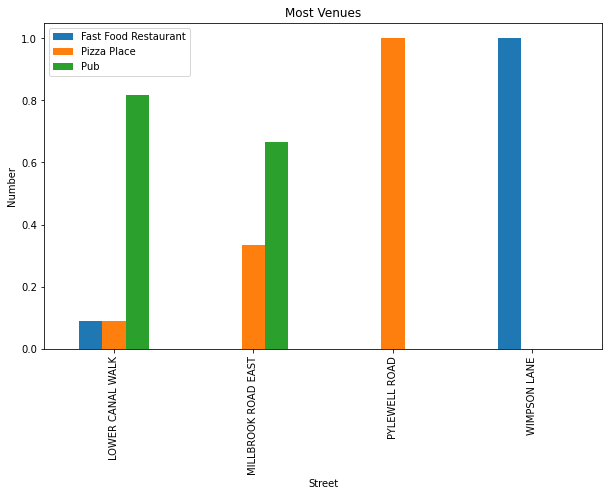

In [101]:

venues_grouped.plot(y = ["Fast Food Restaurant", "Pizza Place", "Pub"], x ="Street", kind='bar', figsize=(10, 6))

plt.xlabel('Street') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Most Venues') # add title to the plot

plt.show()

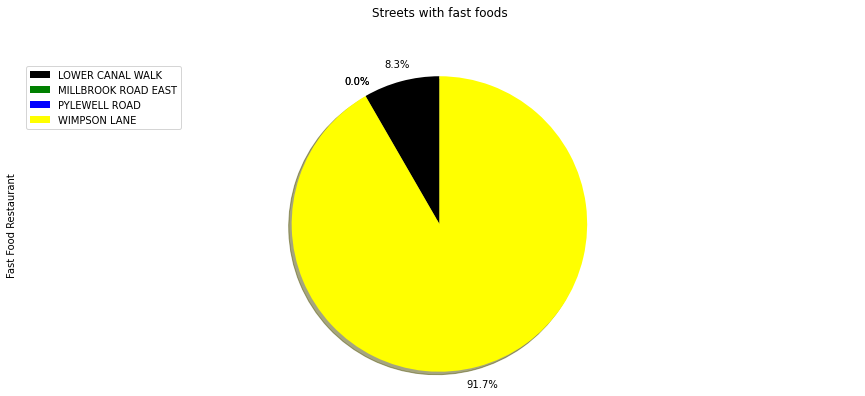

In [102]:
colors_list = ['black', 'green', 'blue', 'yellow', 'gray','coral', 'pink','red','orange','brown','lightblue','cyan','white','purple']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

venues_grouped['Fast Food Restaurant'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Streets with fast foods', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=venues_grouped.Street, loc='upper left') 

plt.show()


In [103]:

num_top_venues = 5

for hood in venues_grouped['Street']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Street'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----LOWER CANAL WALK----
                  venue  freq
0                   Pub  0.82
1  Fast Food Restaurant  0.09
2           Pizza Place  0.09


----MILLBROOK ROAD EAST----
                  venue  freq
0                   Pub  0.67
1           Pizza Place  0.33
2  Fast Food Restaurant  0.00


----PYLEWELL ROAD----
                  venue  freq
0           Pizza Place   1.0
1  Fast Food Restaurant   0.0
2                   Pub   0.0


----WIMPSON LANE----
                  venue  freq
0  Fast Food Restaurant   1.0
1           Pizza Place   0.0
2                   Pub   0.0




In [ ]:
# Define a function to return the most common venues/facilities nearby real estate investments#

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [105]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Street']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [106]:
# create a new dataframe
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Street'] = venues_grouped['Street']

for ind in np.arange(venues_grouped.shape[0]):
    venues_sorted.iloc[ind, 0:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

In [107]:
venues_sorted


,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,LOWER CANAL WALK,Pub,Pizza Place,Fast Food Restaurant
1,MILLBROOK ROAD EAST,Pub,Pizza Place,Fast Food Restaurant
2,PYLEWELL ROAD,Pizza Place,Pub,Fast Food Restaurant
3,WIMPSON LANE,Fast Food Restaurant,Pub,Pizza Place


In [108]:
kclusters = 2
southampton_clustering = venues_grouped.drop('Street', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(southampton_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1], dtype=int32)

In [109]:
# add clustering labels
venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

southampton_merged = southampton_dream

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
southampton_merged= southampton_merged.join(venues_sorted.set_index('Street'), on='Street')

southampton_merged
# check the last columns!

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
318,PYLEWELL ROAD,60000.0,"(50.8694403, -1.4000328)",50.869440,-1.400033,0.0,Pizza Place,Pub,Fast Food Restaurant
436,WIMPSON LANE,85500.0,"(50.9201304, -1.4571668)",50.920130,-1.457167,1.0,Fast Food Restaurant,Pub,Pizza Place
206,KENSINGTON FIELDS,110000.0,"(50.8604243, -1.4207463)",50.860424,-1.420746,NaN,NaN,NaN,NaN
226,LOWER CANAL WALK,115000.0,"(50.897111, -1.4022897)",50.897111,-1.402290,0.0,Pub,Pizza Place,Fast Food Restaurant
251,MILLBROOK ROAD EAST,119500.0,"(50.9098907, -1.4266578)",50.909891,-1.426658,0.0,Pub,Pizza Place,Fast Food Restaurant


In [110]:

southampton_merged = southampton_merged[np.isfinite(southampton_merged['ClusterLabels'])]
southampton_merged = southampton_merged.astype({"ClusterLabels": int})     # because some of the labels were none we made them into ints
southampton_merged

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
318,PYLEWELL ROAD,60000.0,"(50.8694403, -1.4000328)",50.869440,-1.400033,0,Pizza Place,Pub,Fast Food Restaurant
436,WIMPSON LANE,85500.0,"(50.9201304, -1.4571668)",50.920130,-1.457167,1,Fast Food Restaurant,Pub,Pizza Place
226,LOWER CANAL WALK,115000.0,"(50.897111, -1.4022897)",50.897111,-1.402290,0,Pub,Pizza Place,Fast Food Restaurant
251,MILLBROOK ROAD EAST,119500.0,"(50.9098907, -1.4266578)",50.909891,-1.426658,0,Pub,Pizza Place,Fast Food Restaurant


In [111]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(southampton_merged['Latitude'], southampton_merged['Longitude'], southampton_merged['Street'], southampton_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [112]:

southampton_merged.loc[southampton_merged['ClusterLabels'] == 0, southampton_merged.columns[[1] + list(range(5, southampton_merged.shape[1]))]].head()

,Avg_Price,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
318,60000.0,0,Pizza Place,Pub,Fast Food Restaurant
226,115000.0,0,Pub,Pizza Place,Fast Food Restaurant
251,119500.0,0,Pub,Pizza Place,Fast Food Restaurant


In [113]:
southampton_merged.loc[southampton_merged['ClusterLabels'] == 1, southampton_merged.columns[[1] + list(range(5, southampton_merged.shape[1]))]].head()

,Avg_Price,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
436,85500.0,1,Fast Food Restaurant,Pub,Pizza Place
